# HAB_Capstone_EDA

In this notebook I will continue to explore the GLERL data set which contains measurements related to Lake Erie water quality and the growth of Harmful Algal Blooms (HABs). Individual series distributions have already been explored and visualized in the HAB_Capstone_Data_Wrangling_2 notebook. Here I will begin to examine relationships and correlations (or lake thereof) between data series.

In [ ]:
import datetime as dt
import folium
#from glob import glob
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
#import os
import pandas as pd
#import re
import seaborn as sns
import statsmodels.api as sm 
#from statsmodels.graphics.api import abline_plot  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing

In [82]:
surface = pd.read_csv('../data/interim/surface.csv', index_col=0, parse_dates=['Date'])

In [83]:
surface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 986
Data columns (total 35 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           987 non-null    datetime64[ns]
 1   Site                                                           987 non-null    object        
 2   Station Depth (m)                                              977 non-null    float64       
 3   Sample Depth (m)                                               987 non-null    float64       
 4   Sample Depth (category)                                        987 non-null    object        
 5   Local Time (Eastern Time Zone)                                 981 non-null    object        
 6   Latitude (decimal deg)                                         987 non-null    float64       
 7  

In [4]:
surface.head()

,Date,Site,Station Depth (m),Sample Depth (m),Sample Depth (category),Local Time (Eastern Time Zone),Latitude (decimal deg),Longitude (decimal deg),Wind speed (knots),Wave Height (ft),...,Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L),Month,Phosphate (µg/L)
0,2012-05-15,WE4,10.0,0.75,Surface,10:08,41.8267,-83.1933,NaN,NaN,...,2.02,28.79,0.325,0.34,0.05,NaN,3.15,1.01,12-May,NaN
1,2012-05-15,WE6,2.7,0.75,Surface,11:02,41.7052,-83.3853,NaN,NaN,...,2.97,35.70,0.515,0.40,0.08,NaN,2.90,0.98,12-May,NaN
2,2012-05-15,WE8,4.5,0.75,Surface,11:31,41.8339,-83.3640,NaN,NaN,...,3.02,11.28,0.513,0.49,0.12,NaN,4.32,1.06,12-May,NaN
3,2012-05-31,WE2,8.2,0.75,Surface,11:15,41.7625,-83.3286,NaN,NaN,...,5.15,14.68,0.466,0.50,0.07,NaN,21.42,2.40,12-May,NaN
4,2012-05-31,WE4,5.0,0.75,Surface,11:50,41.8265,-83.1934,NaN,NaN,...,0.37,15.38,0.323,0.99,0.16,NaN,4.92,1.52,12-May,NaN


In [39]:
#Let's start by examining any correlations
surface.corr()

,Station Depth (m),Sample Depth (m),Latitude (decimal deg),Longitude (decimal deg),Wind speed (knots),Wave Height (ft),Secchi Depth (m),CTD Temperature (°C),CTD Specific Conductivity (µS/cm),CTD Beam Attenuation (m-1),...,Total Dissolved Phosphorus (µg P/L),Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L),Phosphate (µg/L)
Station Depth (m),1.000000,-0.040674,0.271050,0.706128,-0.028259,0.130332,0.427929,0.000905,-0.563265,-0.370404,...,-0.343787,-0.306362,-0.079576,-0.308908,-0.126306,-0.121500,-0.447828,-0.260191,-0.147356,-0.030075
Sample Depth (m),-0.040674,1.000000,-0.037338,-0.021537,-0.020694,0.002779,-0.034082,0.025902,0.034722,0.023235,...,0.018208,0.012939,-0.011324,0.016573,0.007217,0.007065,0.031554,0.014447,0.007913,0.006286
Latitude (decimal deg),0.271050,-0.037338,1.000000,-0.255616,0.089092,0.076596,0.233684,-0.003691,-0.138097,-0.191839,...,-0.139409,-0.160250,-0.050719,-0.078654,0.000500,0.004706,-0.136982,-0.104255,-0.003200,0.069024
Longitude (decimal deg),0.706128,-0.021537,-0.255616,1.000000,-0.080957,0.095574,0.372534,-0.011079,-0.520234,-0.347868,...,-0.346489,-0.314764,-0.095732,-0.333844,-0.101270,-0.097753,-0.453144,-0.240405,-0.118816,-0.048005
Wind speed (knots),-0.028259,-0.020694,0.089092,-0.080957,1.000000,0.465553,0.041083,-0.033844,0.128482,0.036625,...,-0.080944,-0.006834,0.131272,0.035567,-0.089864,-0.083001,-0.078646,-0.009407,-0.094824,0.029799
Wave Height (ft),0.130332,0.002779,0.076596,0.095574,0.465553,1.000000,-0.026576,-0.300846,-0.038124,0.030429,...,-0.061429,-0.023867,0.056171,-0.014095,-0.089970,-0.082520,-0.111623,-0.002070,-0.080400,0.022263
Secchi Depth (m),0.427929,-0.034082,0.233684,0.372534,0.041083,-0.026576,1.000000,0.126829,-0.250374,-0.551407,...,-0.258632,-0.268288,-0.087403,-0.105612,-0.166252,-0.171754,-0.332398,-0.398211,-0.174152,-0.028110
CTD Temperature (°C),0.000905,0.025902,-0.003691,-0.011079,-0.033844,-0.300846,0.126829,1.000000,-0.024559,-0.277420,...,-0.072686,-0.085707,-0.149421,0.075894,0.049243,0.053917,0.079161,-0.166454,0.039030,0.027959
CTD Specific Conductivity (µS/cm),-0.563265,0.034722,-0.138097,-0.520234,0.128482,-0.038124,-0.250374,-0.024559,1.000000,0.272062,...,0.451716,0.400314,0.260301,0.557787,0.025187,0.026978,0.482888,0.139831,0.038249,0.009142
CTD Beam Attenuation (m-1),-0.370404,0.023235,-0.191839,-0.347868,0.036625,0.030429,-0.551407,-0.277420,0.272062,1.000000,...,0.441942,0.523683,0.244933,0.286506,0.132241,0.130171,0.486763,0.637263,0.158099,-0.007959


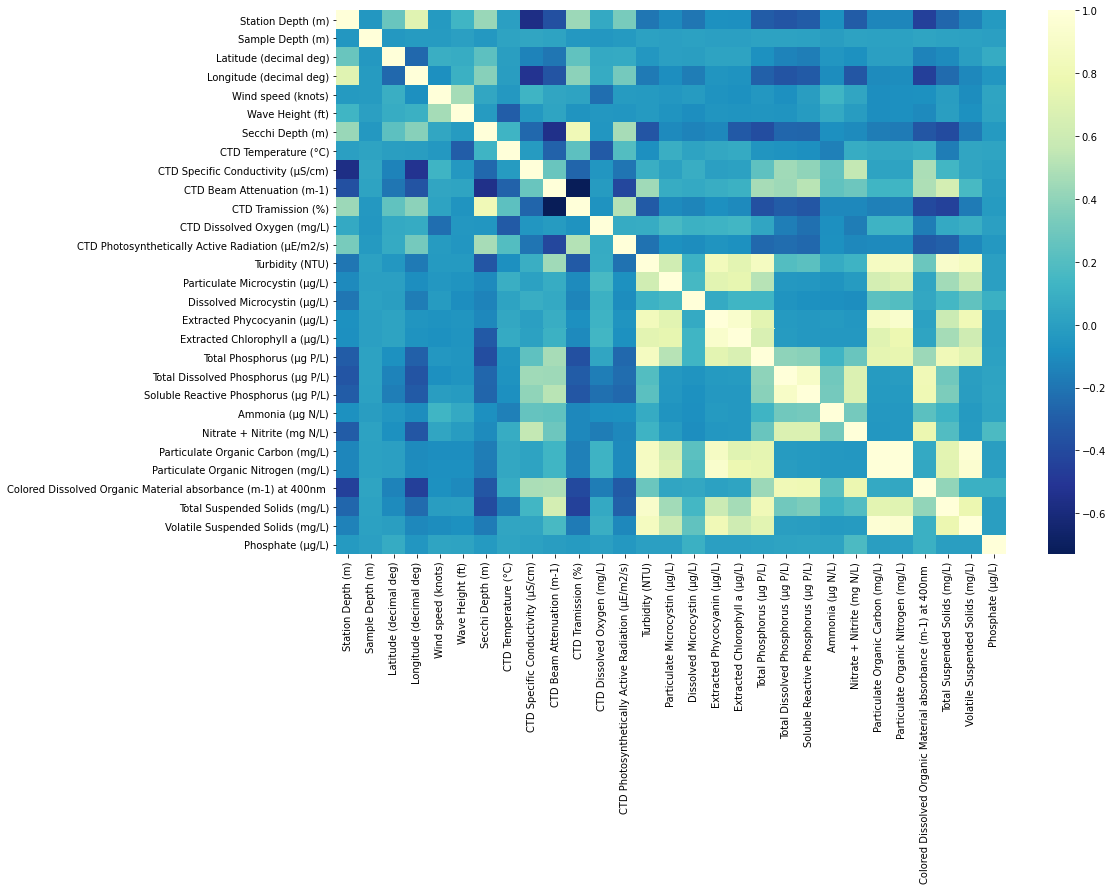

In [43]:
#Visualize the correlations with a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(surface.corr(), cmap='YlGnBu_r')
plt.show()

Some of the correlations in the above heatmap can be explained with straightforward relationships between scientific quantities. For example, transmission and beam attenuation have the defined relationship: 

    c=-(1/r)*ln(%Tr/100) 
    where c=beam attenuation coefficient (m^-1), r=beam path length (m), and Tr=% beam transmission
    
Other relationships are not strictly defined mathematically but are expected. For example, Secchi depth is the depth at which a Secchi disk is no longer visible, which should naturally increase with percent light transmission, and decrease with beam attenuation, increasing turbidity, and increasing particulate matter in the water. Turbidity has a large number of strong positive correlations, which also makes sense since turbidity is simply a measure of the cloudiness of the water, which naturally increases as particulate matter increases, and relates directly to transmission and attenuation.

Quantities indicating the growth of algae, phytoplankton, and cyanobacteria such as Phycocyanin, Chlorophyll, and Particulate Microcystin all have positive correlations with each other, as well as weaker correlations with Turbidity and Total Phosphorus. This may at first seem strange since we know that these creatures consume Phosphorus, but Total Phosphorus should include any phosphorus that was incorporated into the actual algae itself. Note that dissolved forms of Phosphorus do not show any correlation with Phycocyanin, Chlorophyll, or Particulate Microcystin.

Specific conductivity has some weak positive correlations with various chemical quantities of interest, notably Nitrates and Nitrites, Total Dissolved Phosphorus, and Dissolved Organic Material. This could be due to direct effect, as Nitrates and Nitrites are negatively charged anions, and many dissolved forms of phosphorus and organic material are likely also ions. This could also be due to correlation, since N- and P-containing compounds tend to come from runoff or lake inflows that can also carry other ionic compounds (e.g. halides). Interestingly, besides Total Phosphorus it does not seem like nutrients such as the N-containing compounds or soluble P-containing compounds have any notable correlation with Microcystin amounts. In the case of Total Phosphorus as noted above this may very well be because the Total Phosphorus may include intracellular Phosphorus, and would therefore just be another indication of the presence of an HAB, rather than an independent correlated measurement. The lack of correlation between the Microcystin amount and known HAB nutrients is possibly because of the time lag between the establishment of an HAB-friendly environment (warm temperatures, nutrient-rich) and the growth of the HAB itself. Also, as the HAB grows it consumes nutrients, decreasing their amounts until the bloom can no longer be sustained. This suggests that some sort of time series analysis may be necessary.

Interestingly, Temperature and Dissolved Oxygen don't have many strong correlations. They have a weak correlation with each other - warmer temperatures correlate with less dissolved oxygen, with the plausible mechanistic hypothesis that warmer temperature promote the growth of aerobic organisms that consume oxygen.  Temperature is also naturally correlated with sample depth (deeper samples are colder). 

We can take a closer look at scatterplots of the various correlations.

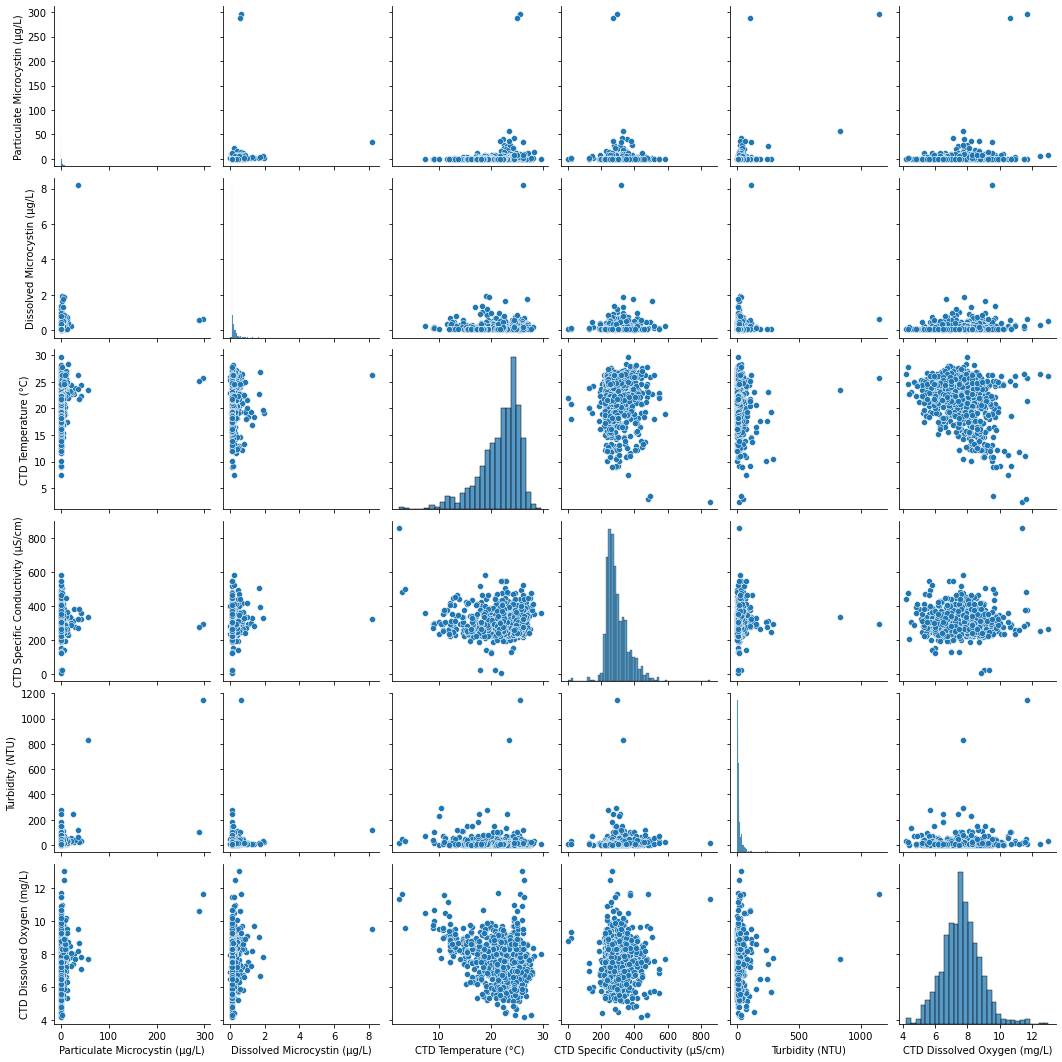

In [46]:
#Pairplot of physical environmental inputs and HAB indicators
sns.pairplot(data=surface,
             vars=['Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)','CTD Temperature (°C)', 'CTD Specific Conductivity (µS/cm)', 'Turbidity (NTU)', 'CTD Dissolved Oxygen (mg/L)'])

There are no clear correlations here with the possible exception of the weak negative correlation between temperature and dissolved oxygen.

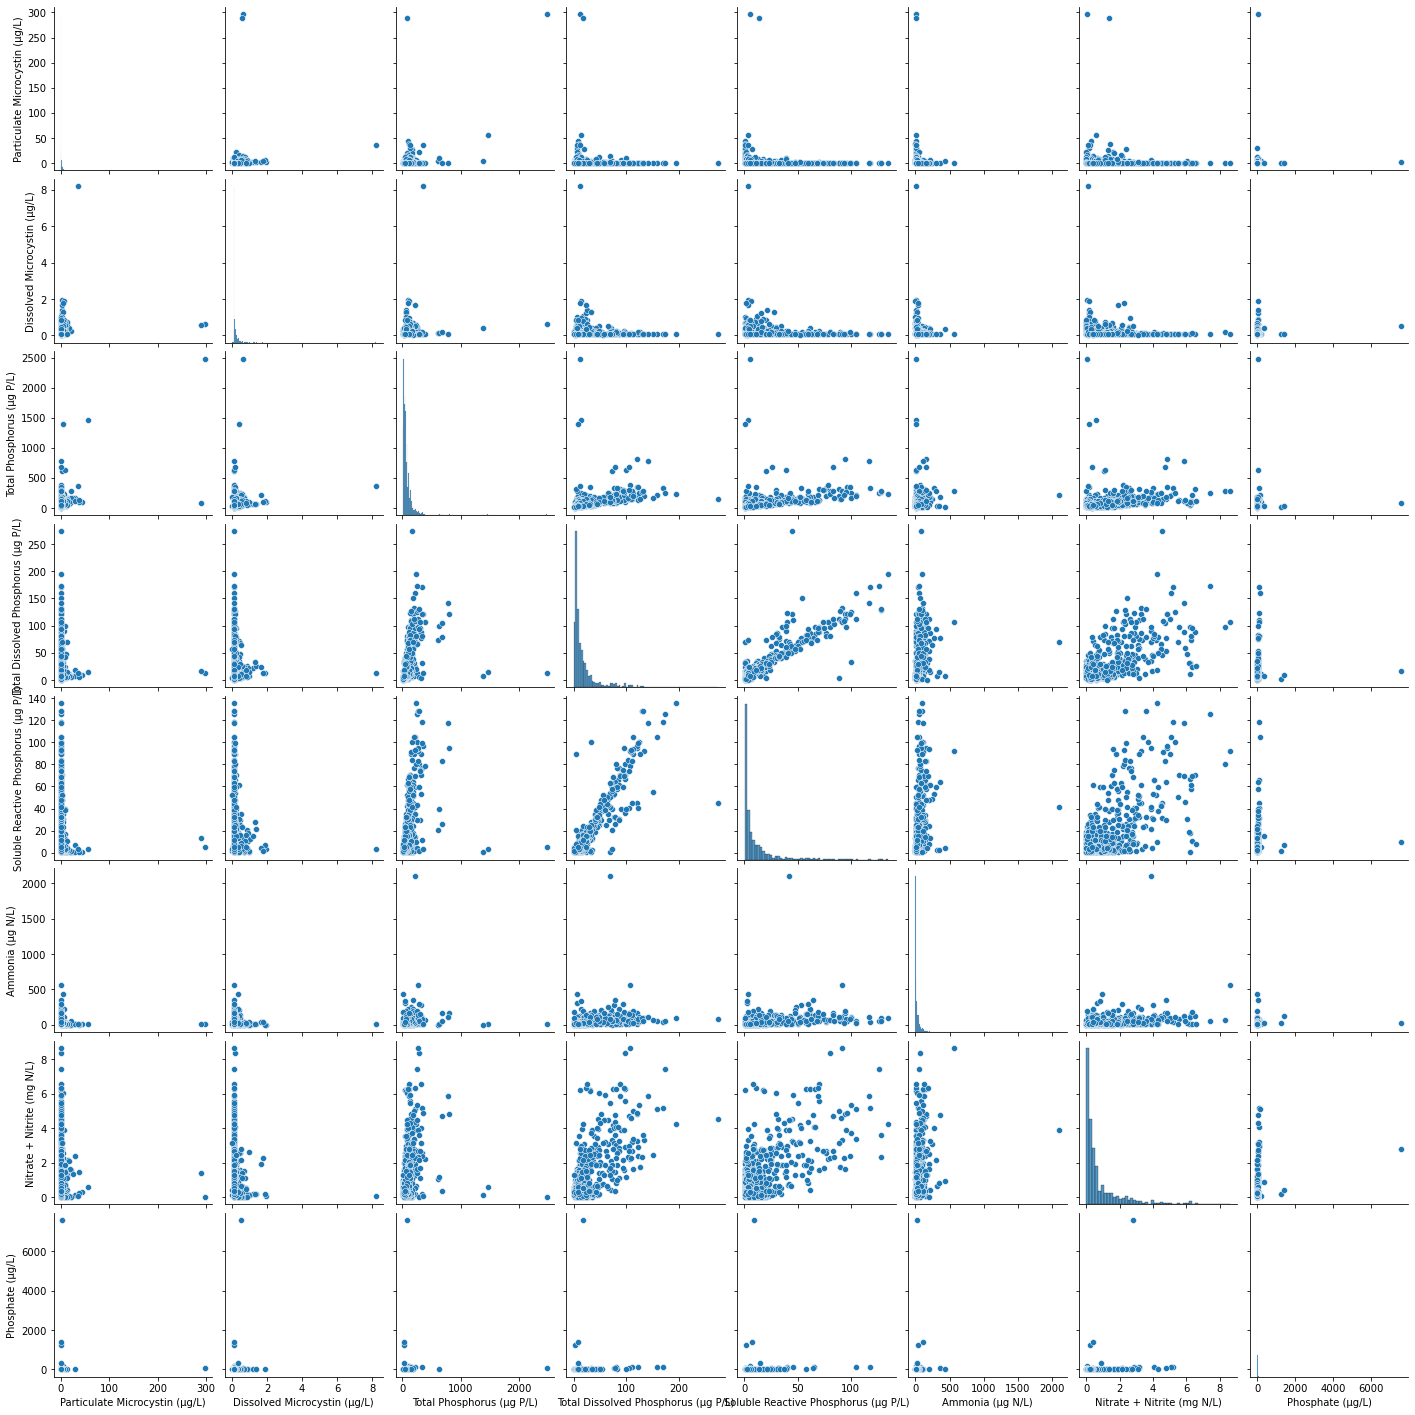

In [47]:
#Pairplot of chemical environmental inputs and HAB indicators
sns.pairplot(data=surface,
             vars=['Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)', 'Total Phosphorus (µg P/L)', 
                   'Total Dissolved Phosphorus (µg P/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Ammonia (µg N/L)', 
                   'Nitrate + Nitrite (mg N/L)', 'Phosphate (µg/L)'])

There are some correlations between nutrients that we noted earlier - soluble forms of phosphorus tend to weakly correlate with nitrates and nitrites. Soluble reactive phosphorus is strongly correlated with total dissolved phosphorus. We can also confirm that there is no clear correlation between the microcystin amounts and the nutrient amounts. 

Let's explore the hypothesis of a time lag between favorable HAB growth conditions and HAB indicators. We need to look at how these values vary over time in a restricted location. First let's see if there are any geographical patterns in where HAB indicators tend to be highest.

In [48]:
#Select data points with top microcystin values. 
top_mcn = surface[surface['Particulate Microcystin (µg/L)'] >= surface['Particulate Microcystin (µg/L)'].quantile(0.9)]

In [10]:
def mapsites(df, col=None):
    """Maps site measurements and labels them by site name and date. If a numeric column name is optionally entered then the
    icons will be color coded according to value quartile, with green as the lowest quartile up to dark red as the top quartile."""
    m = folium.Map(location=[41.76, -83.26])
    if col:
        crange = df[col].describe()
    for i in df.index:
        lat = df.loc[i, 'Latitude (decimal deg)']
        long = df.loc[i, 'Longitude (decimal deg)']
        site = df.loc[i,'Site']
        date = df.loc[i, 'Date']

        if col:
            val = df.loc[i, col]
            if val <= crange['25%']:
                color = 'green'
            elif val <= crange['50%']:
                color = 'orange'
            elif val <= crange['75%']:
                color = 'red'
            else:
                color = 'darkred'
            folium.Marker([lat, long], popup=(lat,long), tooltip=(site, date), icon=folium.Icon(color=color)).add_to(m)
        else:
            folium.Marker([lat, long], popup=(lat,long), tooltip=(site, date)).add_to(m)
            
    return m

In [11]:
#Map top 10% of microcystin values and color code icons according to particulate microcystin quartiles within that data set. 
mapsites(top_mcn, col='Particulate Microcystin (µg/L)')

It seems the top microcystin measurements tend to be near the shore. This matches intuition on several counts:

1. The water at these locations is shallower and may be expected to reach higher temperatures for longer periods of time.
2. Areas near the shore will have higher concentrations of nutrients due to runoff. In particular the Maumee River that flows into Lake Erie near site WE6 is a major source of nutrient loading into the lake due to agricultural runoff. The river was identified as an area of concern by the EPA 1987 Great Lakes Water Quality Agreement for this reason [<a href='https://19january2017snapshot.epa.gov/maumee-river-aoc_.html'>ref</a>].

We can compare the top 10% of microcystin observations with the bottom 50%.

In [12]:
low_mcn = surface[surface['Particulate Microcystin (µg/L)'] <= surface['Particulate Microcystin (µg/L)'].quantile(0.5)]

In [14]:
mapsites(low_mcn)

These sites tend to be much more evenly distributed and reflective of the general measurement space. 

Let's examine trends over time at sites where high microcystin values tend to be more likely.

In [84]:
#Select closely grouped 'WE6' observations
we6 = surface[(surface.Site == 'WE6') & (surface['Latitude (decimal deg)'] < 41.79) 
              & (surface['Longitude (decimal deg)'] > -83.45)]

In [16]:
#Confirm that measurements are within one area
mapsites(we6)

In [120]:
def timeplot(df, cols, datecol='Date', logy=False, squish=False):
    
    """Plots columns in a dataframe with a DateTime column as subplots with the DateTime as the x-axis. The DateTime
    column is assumed to be named 'Date' or can be entered as an input. Columns should be in list format, and 
    the y-axis can optionally be plotted on a log scale by setting logy=True"""
    
    #insert dummy NaNs for January months to prevent linear interpolation from year to year
    if ~squish:
        years = df.Date.dt.year.unique()
        null = pd.DataFrame(data={'Date': [pd.to_datetime('{0}-01-01'.format(y)) for y in years]})
        temp = df.append(null)
        
    fig, ax = plt.subplots(len(cols),1, figsize=(15,3.5 * len(cols)))
    for i, col in enumerate(cols):
        if squish:
            temp = df[cols + [datecol]].copy()
            temp['DateString'] = temp[datecol].astype('str')
            temp.plot(x='DateString', y=col, marker='.',ax=ax[i], sharex=True, logy=logy, color='C{0}'.format(i))
            ax[i].set_ylabel(col)
        else:
            temp.plot(x=datecol, y=col, marker='.',ax=ax[i], sharex=True, logy=logy, color='C{0}'.format(i))
            ax[i].set_ylabel(col)
    site = df.iloc[0]['Site']
    fig.suptitle('{0} Time Series'.format(site))
    fig.tight_layout()
    plt.show()

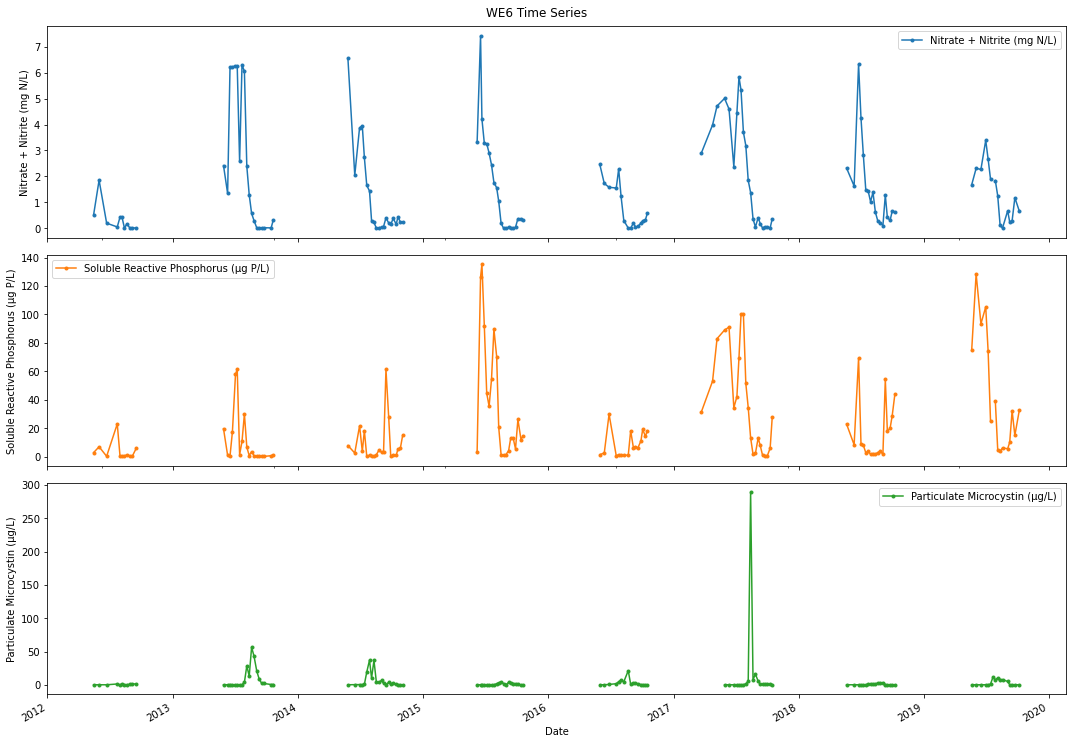

In [123]:
timeplot(we6, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'], 
         logy=False)

It's a little difficult to see the time-lag here because the spacing between the years compresses each summer of data. We can adjust the plot by using squish=True to only look at recorded dates, and using logy=True to use a log scale on the y-axis.

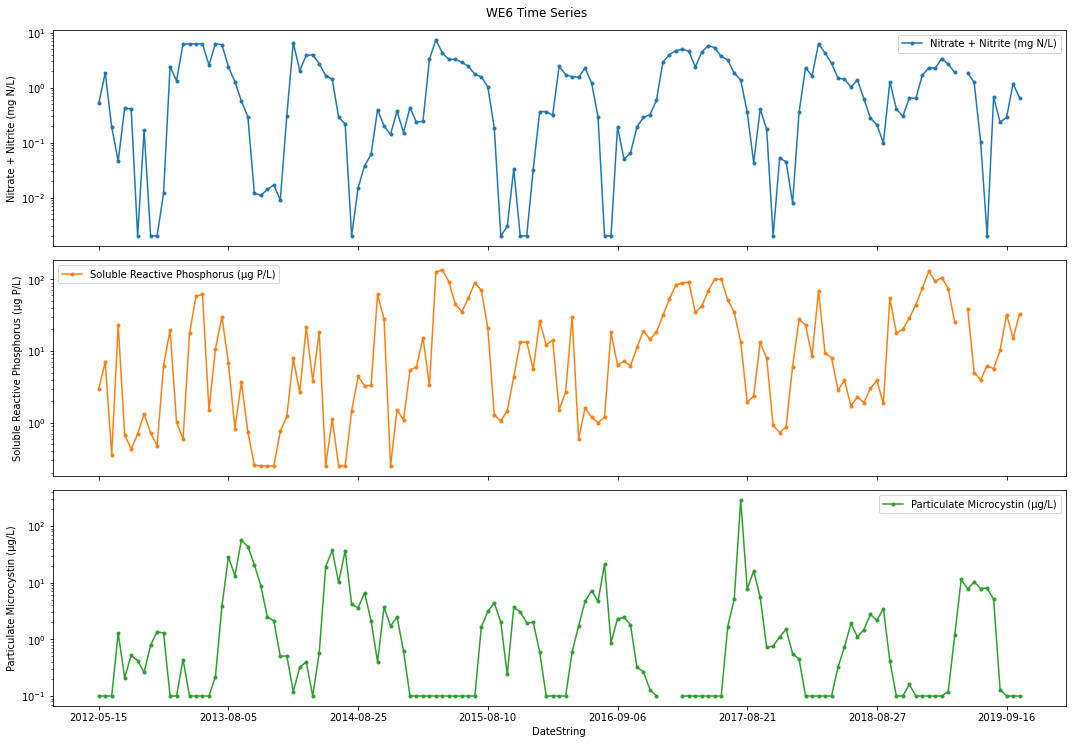

In [121]:
timeplot(we6, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'], 
         logy=True, squish=True)

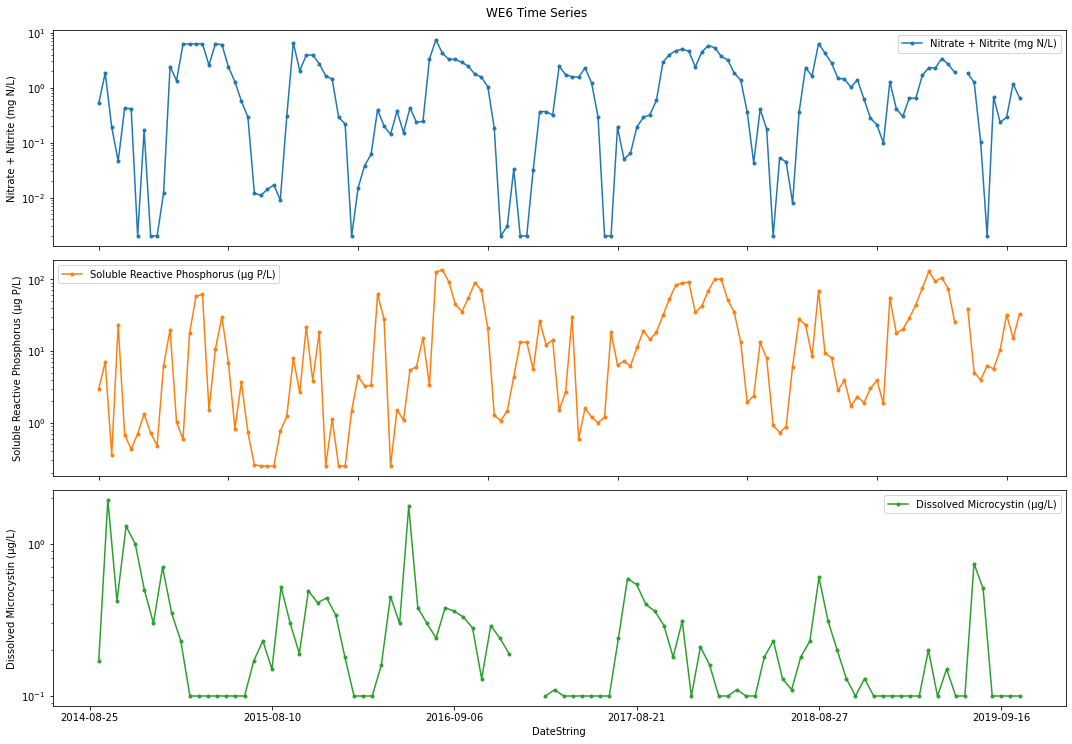

In [124]:
timeplot(we6, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Dissolved Microcystin (µg/L)'], 
         logy=True, squish=True)

There certainly appears to be a time lag between nutrient loading and particulate microcystin increase. In fact they seem to alternate with each other. This trend is not as pronounced with dissolved microcystin. In fact dissolved and particulate microcystin do not follow the same trend in time as shown below. A USGS study, <a href='https://pubs.usgs.gov/sir/2012/5069/pdf/sir20125069.pdf'>Spatial and Temporal Dynamics of Cyanotoxins and Their Relation to Other Water Quality Variables in Upper Klamath Lake, Oregon, 2007–09</a>, found that dissolved and particulate microcystin did not follow the same exact trend over time. They noted that:

<p style="margin-left:10%; margin-right:10%;">"It is, therefore, difficult to interpret the meaning of the higher percentage of dissolved microcystins that year, particularly because the regulation of toxin production in cyanobacteria is not well understood and the microcystin content of individual cells may be highly variable. However, toxins are released into the water column primarily following death and senescence of a toxigenic bloom, so it is likely that higher dissolved microcystin concentrations in 2008 represent longer or more frequent periods of decline in the microcystin-producing population."</p>

This could explain the rise of dissolved microcystin after the fall of particulate microcystin seen below.

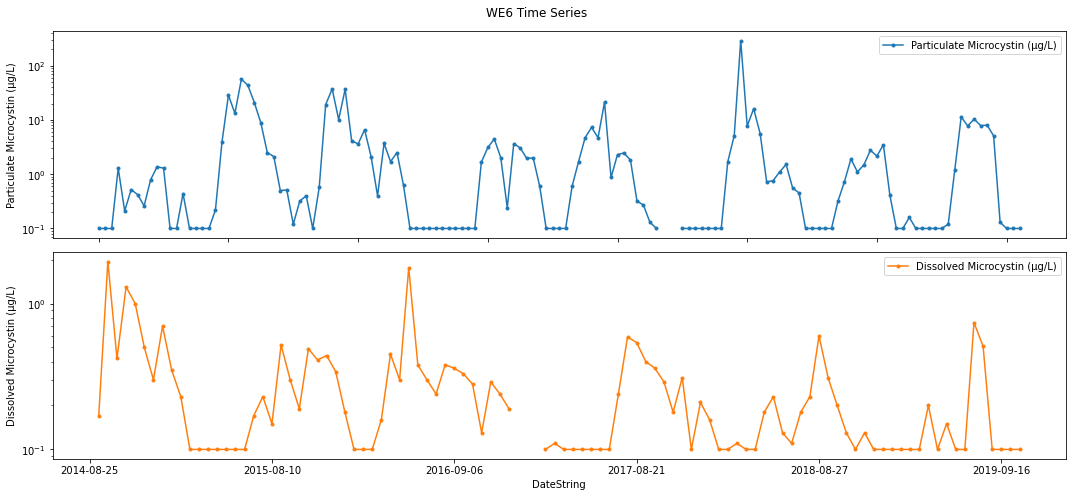

In [125]:
timeplot(we6, ['Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)'], logy=True, squish=True)

In [126]:
we6.columns

Index(['Date', 'Site', 'Station Depth (m)', 'Sample Depth (m)',
       'Sample Depth (category)', 'Local Time (Eastern Time Zone)',
       'Latitude (decimal deg)', 'Longitude (decimal deg)',
       'Wind speed (knots)', 'Wave Height (ft)', 'Sky', 'Secchi Depth (m)',
       'CTD Temperature (°C)', 'CTD Specific Conductivity (µS/cm)',
       'CTD Beam Attenuation (m-1)', 'CTD Tramission (%)',
       'CTD Dissolved Oxygen (mg/L)',
       'CTD Photosynthetically Active Radiation (µE/m2/s)', 'Turbidity (NTU)',
       'Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)',
       'Extracted Phycocyanin (µg/L)', 'Extracted Chlorophyll a (µg/L)',
       'Total Phosphorus (µg P/L)', 'Total Dissolved Phosphorus (µg P/L)',
       'Soluble Reactive Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)',
       'Colored Dissolved Organic Material absorbance (m-1) at 400nm ',
       '

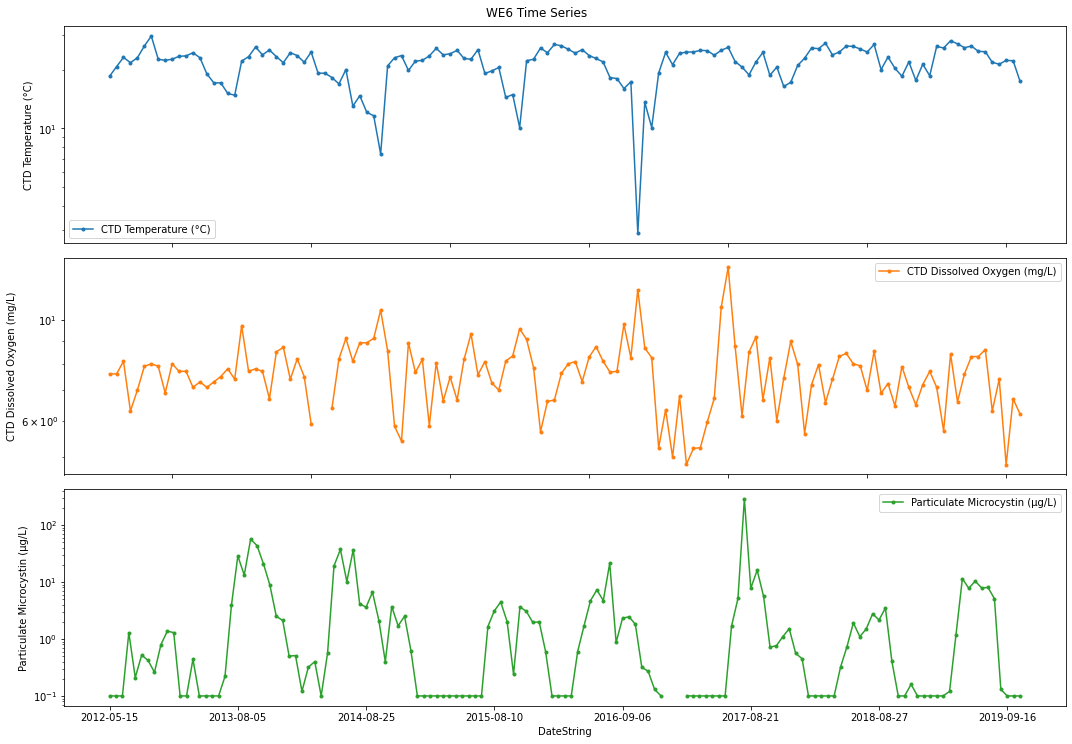

In [127]:
timeplot(we6, ['CTD Temperature (°C)', 'CTD Dissolved Oxygen (mg/L)', 'Particulate Microcystin (µg/L)'], logy=True, squish=True)

Particulate microcystin rises in late summer, after sustained warm temperatures. It is more difficult to draw meaningful conclusions regarding the relationship between dissolved oxygen, and particulate microcystin. Algae are obligate anaerobes, so they would be expected to die off in the absence of dissolved oxygen. We see some suggestion of this at various points (e.g. after September of 2016) but this is not consistent given the constant variability in the dissolved oxygen measurements. 

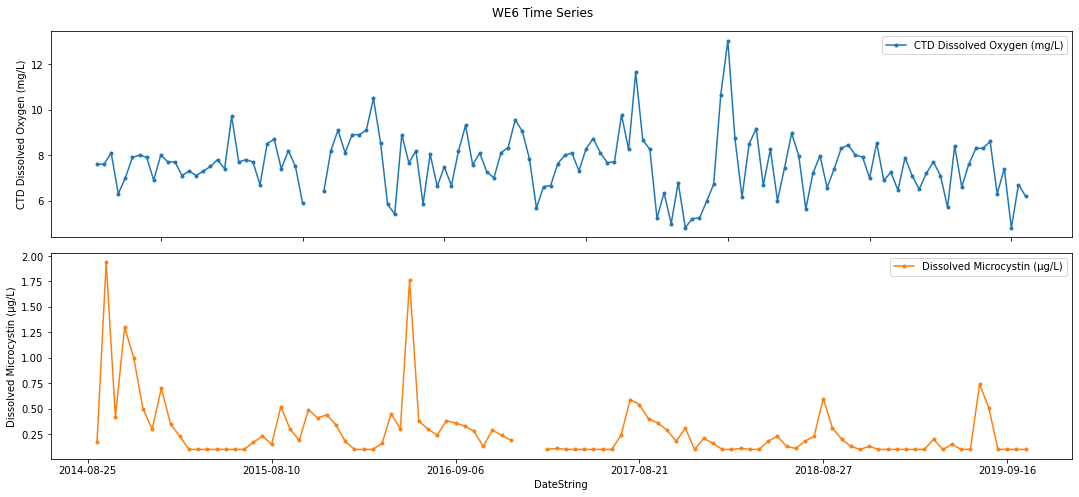

In [130]:
timeplot(we6, ['CTD Dissolved Oxygen (mg/L)', 'Dissolved Microcystin (µg/L)'], logy=False, squish=True)

Again with dissolved microcystin there is no clear relationship. The large peak prior to September 2016 in dissolved microcystin is preceeded by a sustained drop in dissolved oxygen, which again could suggest oxygen depletion leading to a die-off event and release of microcystin. However, the evidence is not strong enough to lead to any firm conclusions, especially since dissolved oxygen and microcystin seem to trend together in August of 2017. 

Let's examine another site to see if the time lag is consistent across locations.

In [132]:
#Locate WE8 measurements within proximity to each other
we8 = surface[(surface.Site == 'WE8') & (surface['Latitude (decimal deg)'] > 41.71)]

In [22]:
#Confirm that sites are close 
mapsites(we8)

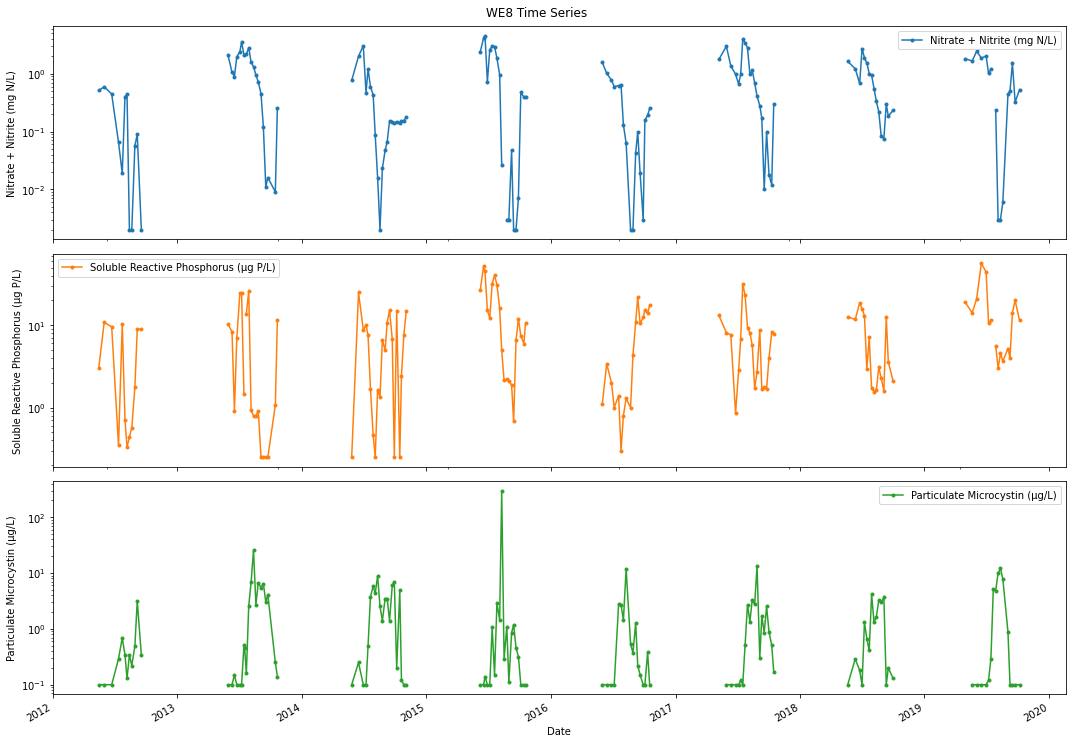

In [136]:
timeplot(we8, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'],
         logy=True, squish=False)

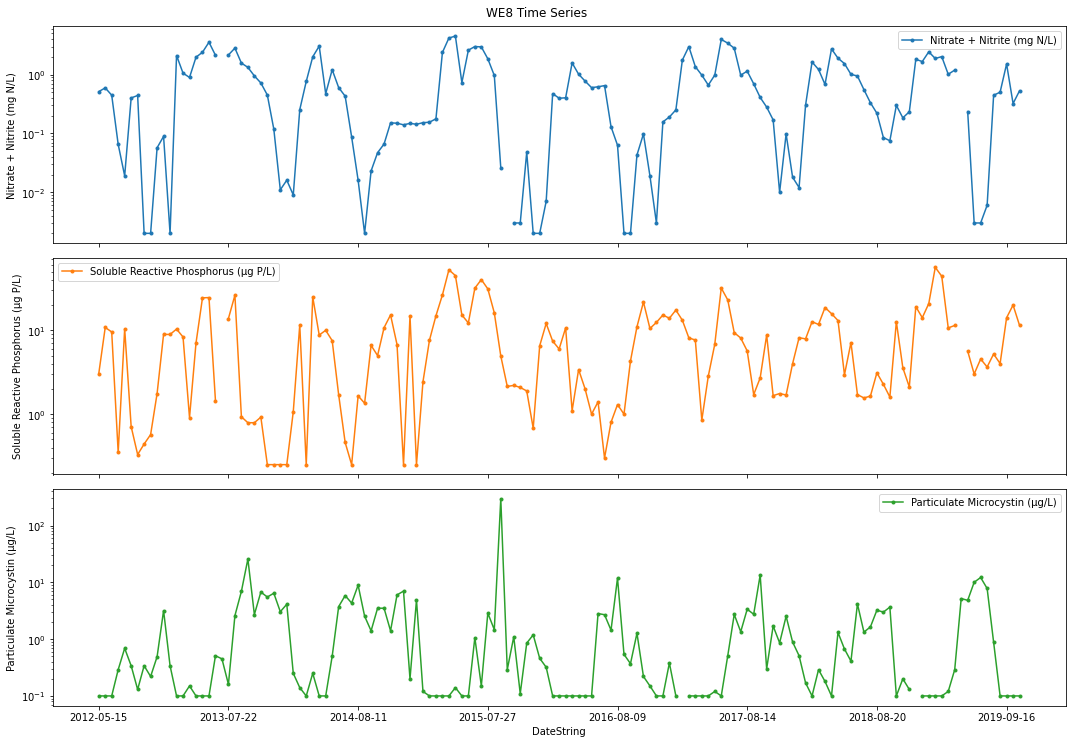

In [134]:
timeplot(we8, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'],
         logy=True, squish=True)

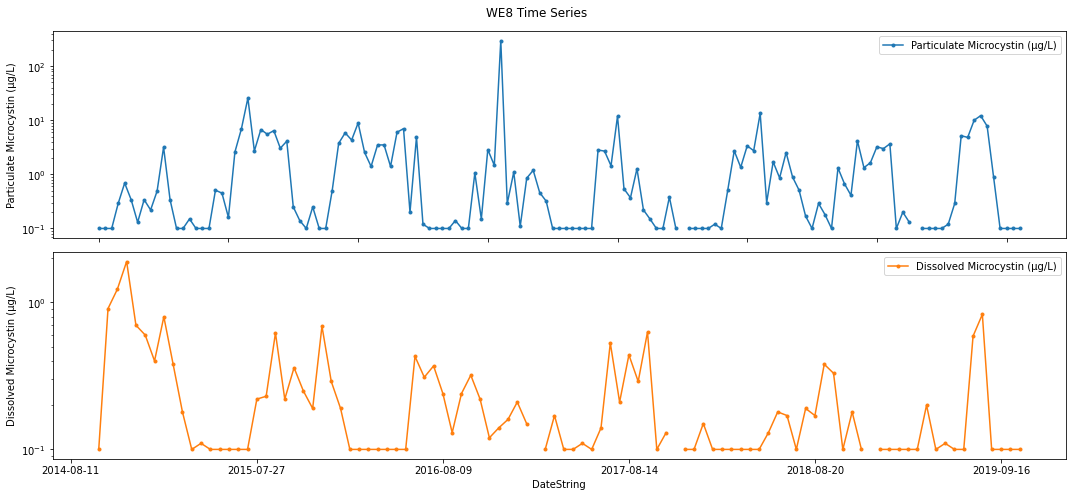

In [135]:
timeplot(we8, ['Particulate Microcystin (µg/L)','Dissolved Microcystin (µg/L)'], logy=True, squish=True)

The WE8 site trends are very similar to those for WE6. It does seem that there is a time lag between favorable HAB conditions and HAB formation.